<a href="https://colab.research.google.com/github/vishal786-commits/machine-learning-journey/blob/main/classical-ml/linear-regression-from-first-principles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Vishal Gopalkrishna**

# **Linear Regression — From First Principles**

---



# **What is Supervised Learning?**

Supervised learning is a type of machine learning where:

- We are work with input-output pairs
- The model learns a relationship *(or a mapping function)* from inputs (X) to outputs (y)

Formally:

We want to create a function:

f : X → y

Where:
- X = Features (independent variables)
- y = Target (dependent variable)

So that, when we get new features or unseen features the functions we have created(*or the model*) will give us a good prediction.

Example:
Predict house price based on area.

We can create a function f: Area (X) → Price (y), based on historical data. And, when we want to predict future price values, can can use current Area(X) data to predict it.

# **What Is Linear Regression?**


Linear Regression tries to model the relationship between input features and output using a linear function.

For one feature:

ŷ = w x + b

Where:
- w = weight (slope)
- b = bias (intercept)
- ŷ = predicted value

**Goal: Find w and b such that predictions are as close as possible to true values.**

*Mainly, Linear regression is different because it draws the best straight line to predict a number, while many other algorithms use curves, rules, or complex patterns to make predictions.*

# **Creating a Realistic Synthetic Dataset**(Optional)

Instead of using a real or anonimised dataset, we will generate data from an actual linear process. This allows us to understand the concept clearly, observe covergence behavious of our model and compare learned parameters with true parameters.

True underlying model:

y = 3x + 7 + noise

Where:
- True weight (w*) = 3
- True bias (b*) = 7
- Noise ~ Normal(0, σ²)



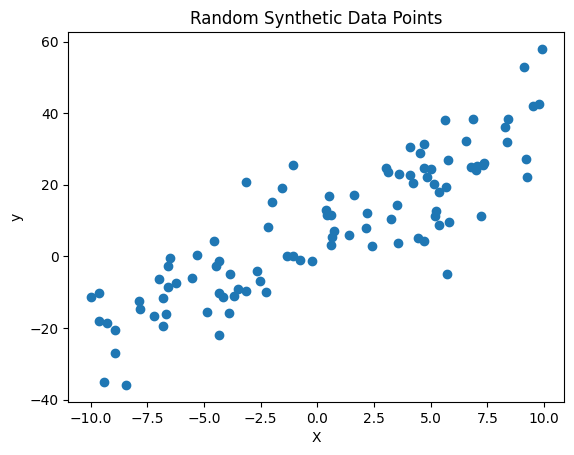

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(197)  # for reproducibility

# Number of data points
m = 100

# Generate feature values
X = np.random.uniform(-10, 10, m)

# True parameters
true_w = 3
true_b = 7

# Add Gaussian noise
noise = np.random.normal(0, 10, m)

# Generate data points
y = true_w * X + true_b + noise

# Visualize
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Synthetic Data Points")
plt.show()

Now we have a dataset where, for each value of x in the range [-10, 10], there is a corresponding y value.

Our goal is to learn the main pattern or underlying relationship between x and y so that we can predict the output for unseen inputs — for example, estimating y when x = 11 or even x = -11.

---

Before we proceed to build the linear model,
We will split this dataset into traning and test data:

- Training set → Used to learn parameters (w, b)
- Test set → Used to evaluate performance on unseen data

In [14]:
# Train/Test Split
from sklearn.model_selection import train_test_split

# reshape because sklearn expects 2D features
X_reshaped = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=123
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 80
Test size: 20


# **Goal of Linear Regression**

Our objective in Linear Regression is to estimate the optimal parameters
**(w, b)** that best explain the relationship between input features and the target.

**In simple terms, we want to find the line that best fits the data — the one that stays as close as possible to all the data points overall.**

We know a straight line is given by the equation:

**ŷ = wx + b**

But we do NOT know the true values of w and b.

Given:
- Training data
**X = {x₁, x₂, ..., xₘ} &
y = {y₁, y₂, ..., yₘ}**

We want to find parameters that minimize prediction error.

**In other words: We are searching for the parameters w and b that make our straight line through the data points as close as possible to the true data.**

We want to minimize the difference between:

Actual value **(yᵢ)**
Predicted value **(ŷᵢ)**

Once we find optimal parameters (w*, b*),
we can use them to make predictions on unseen data.

# **Visualizing Different Lines by Changing Weights**

To understand what "best fit" means, we will:

- Plot 6 different lines on the same dataset
- **Each line uses a different (w, b)**
- One line will be close to the true parameters
- The others will clearly underfit or misfit

We will also compute the MSE for each line.

This helps us visually and mathematically understand
why some parameter choices are better than others.

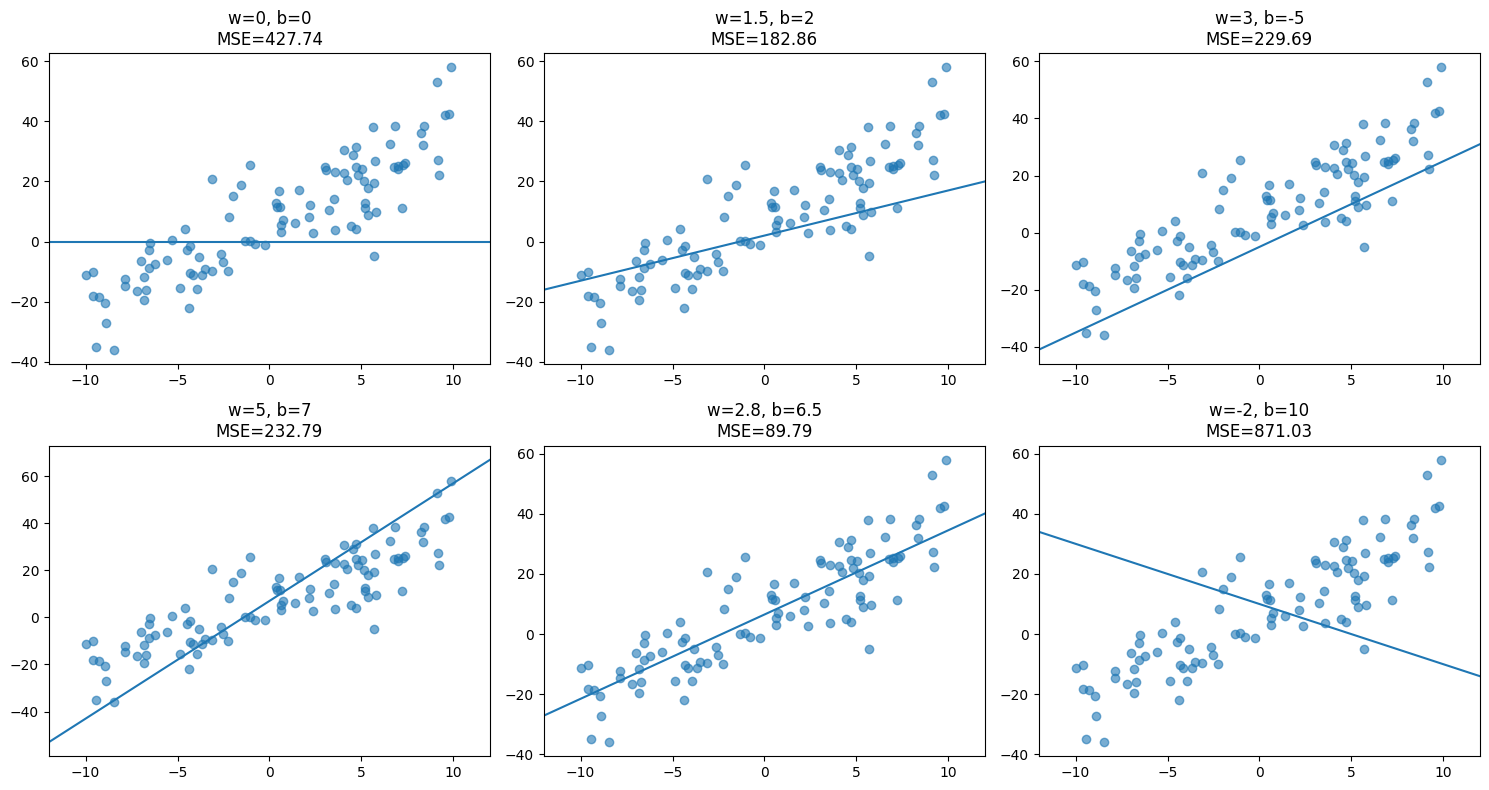

In [15]:
# Candidate parameter sets
parameter_sets = [
    (0, 0),          # very poor fit
    (1.5, 2),        # weak slope
    (3, -5),         # correct slope, wrong intercept
    (5, 7),          # too steep
    (2.8, 6.5),      # close to true (3, 7) but not exact
    (-2, 10)         # completely wrong direction
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

m = len(X)

for i, (w, b) in enumerate(parameter_sets):
    ax = axes[i]

    y_pred = w * X + b
    loss = (1/m) * np.sum((y - y_pred)**2)

    x_line = np.linspace(-12, 12, 100)
    y_line = w * x_line + b

    ax.scatter(X, y, alpha=0.6)
    ax.plot(x_line, y_line)
    ax.set_title(f"w={w}, b={b}\nMSE={loss:.2f}")
    ax.set_xlim(-12, 12)

plt.tight_layout()
plt.show()

Observe:

- Some lines clearly do not represent the data pattern.
- Some lines are closer to the overall trend.
- The line with the smallest MSE is the best fit among these candidates.

This demonstrates that:

"Best line" does not mean passing through every point.
It means minimizing the overall squared error across all data points.

# **Loss Function (Mean Squared Error)**

**Mean Squared Error (MSE)** is the average of how far our predictions are from the real answers.


We define the loss using **Mean Squared Error (MSE)**:

---

$$
L(w, b) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

Substituting the prediction $\hat{y}_i = w x_i + b$:

$$
L(w, b) = \frac{1}{m} \sum_{i=1}^{m} \left(y_i - (w x_i + b)\right)^2
$$

---

### Why do we square the errors?

- It penalizes larger errors more heavily.
- It ensures the loss is always non-negative.
- It is differentiable, which makes optimization using gradient descent possible.

---

*(Now observe the errors (MSE values) for each of the six lines above. Which line appears to follow the overall trend of the data most closely?)*

The line that best represents the data will not necessarily pass through every point, but it will have the smallest overall error — meaning its predictions stay closest to the data on average.

# **Gradient Descent - Intuition Behind Minimization**

ChatGPT Image Feb 27, 2026, 08_41_37 PM.png

---

## **Minima and Maxima of a Function**

Let us consider a function:

$$
f(x)
$$

We are interested in finding points where the function reaches:

* A **minimum** (lowest value)
* A **maximum** (highest value)

---

## **1. Critical Points**

A point ( x = c ) is called a **critical point** if:

$$
f'(c) = 0
$$

or

$$
f'(c) \text{ does not exist}
$$

In optimization (like Linear Regression), we usually focus on:

$$
f'(x) = 0
$$

Why?

Because the derivative represents the slope of the function.

* If slope > 0 → function increasing
* If slope < 0 → function decreasing
* If slope = 0 → flat point (possible minimum or maximum)

---

## **2. First Derivative Test (Slope Intuition)**

If around a point ( c ):

* ( f'(x) ) changes from **positive → negative**,
  then ( c ) is a **local maximum**.

* ( f'(x) ) changes from **negative → positive**,
  then ( c ) is a **local minimum**.

Intuition:

Increasing → Flat → Decreasing = Peak
Decreasing → Flat → Increasing = Valley

---

## **3. Second Derivative Test (Curvature Test)**

Once we find a critical point ( c ) such that:

$$
f'(c) = 0
$$

We compute the second derivative:

$$
f''(c)
$$

Then:

* If ( f''(c) > 0 ) → Local Minimum (curve opens upward ∪)
* If ( f''(c) < 0 ) → Local Maximum (curve opens downward ∩)
* If ( f''(c) = 0 ) → Inconclusive

This works because:

* ( f''(x) > 0 ) means function is **convex**
* ( f''(x) < 0 ) means function is **concave**

---

## **4. Example**

Consider:

$$
f(x) = x^2
$$

First derivative:

$$
f'(x) = 2x
$$

Set derivative to zero:

$$
2x = 0
$$

$$
x = 0
$$

Second derivative:

$$
f''(x) = 2
$$

Since:

$$
f''(0) = 2 > 0
$$

Therefore:

$$
x = 0 \text{ is a minimum}
$$

This makes sense because ( x^2 ) is a bowl-shaped function.

---

## **5. Why This Matters for Linear Regression**

In Linear Regression, we minimize:

$$
L(w, b)
$$

To find optimal parameters, we solve:

$$
\frac{\partial L}{\partial w} = 0
$$

$$
\frac{\partial L}{\partial b} = 0
$$

Because the MSE loss is **convex**, it has:

* One global minimum
* No local minima traps

That is why gradient descent works reliably.

---

# **Big Picture**

Minima and maxima are found by:

1. Taking derivatives
2. Setting them to zero
3. Checking curvature

Optimization in ML is simply calculus applied to loss functions.

---



## **Gradient of a Function**

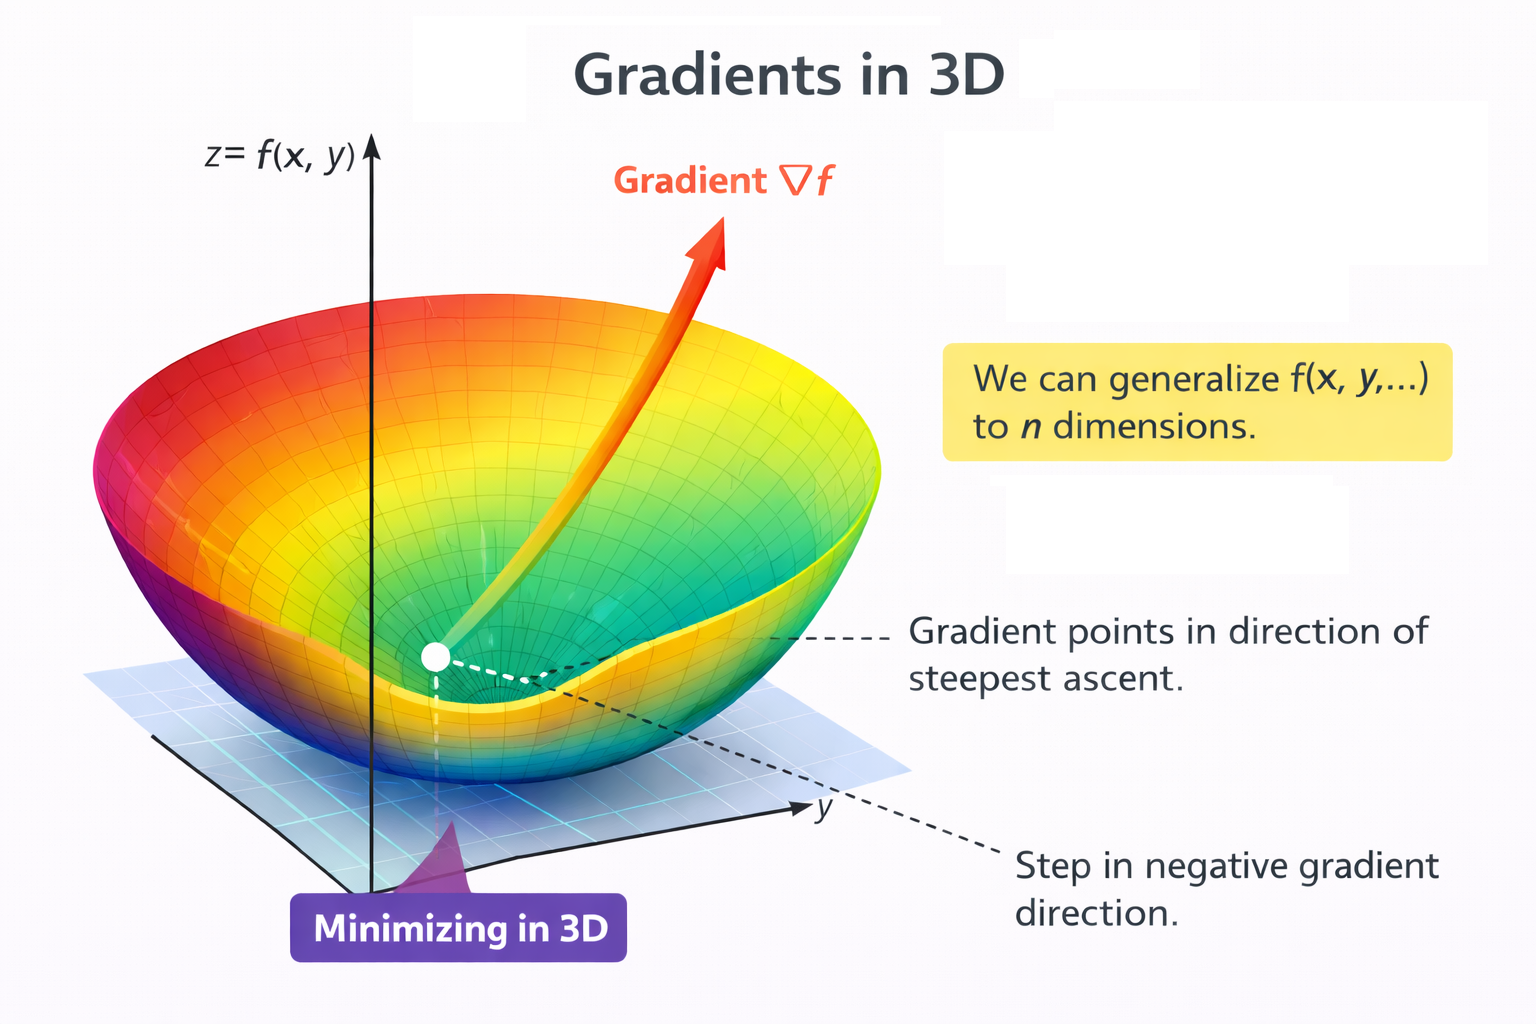





In one dimension, we use the derivative:

$$
f'(x)
$$

But in machine learning, our function usually depends on multiple variables:

$$
f(x_1, x_2, ..., x_n)
$$

In this case, we use the **gradient**.

---

## **1. Definition of Gradient**

For a function:

$$
f(x_1, x_2, ..., x_n)
$$

The gradient is the vector of partial derivatives:

$$
\nabla f =
\begin{bmatrix}
\frac{\partial f}{\partial x_1} \
\frac{\partial f}{\partial x_2} \
\vdots \
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

The symbol ( \nabla ) (nabla) represents the gradient operator.

---

## **2. What Does the Gradient Represent?**

The gradient tells us:

* The direction of **steepest increase**
* How fast the function increases in that direction

If:

$$
\nabla f = 0
$$

Then we are at a critical point (possible minimum or maximum).

---

## **3. Simple Example**

Let:

$$
f(x, y) = x^2 + y^2
$$

Compute partial derivatives:

$$
\frac{\partial f}{\partial x} = 2x
$$

$$
\frac{\partial f}{\partial y} = 2y
$$

So the gradient is:

$$
\nabla f =
\begin{bmatrix}
2x \
2y
\end{bmatrix}
$$

To find critical points:

$$
\nabla f = 0
$$

Which gives:

$$
2x = 0, \quad 2y = 0
$$

So:

$$
x = 0, \quad y = 0
$$

This is the global minimum.

---

## **4. Why Gradient Matters in Machine Learning**

In Linear Regression, the loss depends on parameters:

$$
L(w, b)
$$

Since there are multiple parameters, we compute:

$$
\nabla L =
\begin{bmatrix}
\frac{\partial L}{\partial w} \
\frac{\partial L}{\partial b}
\end{bmatrix}
$$

Gradient Descent updates parameters using:

$$
\theta := \theta - \alpha \nabla L
$$

Where:

* ( \theta ) is the parameter vector
* ( \alpha ) is the learning rate

We move in the **negative gradient direction** because:

* The gradient points toward steepest increase
* We want steepest decrease

---

## **5. Geometric Intuition**

Think of a 3D surface (like a bowl).

At any point:

* The gradient is an arrow
* It points uphill
* Its length tells how steep the slope is

Gradient Descent simply walks downhill step by step.

---

## **Big Picture**

Derivative → slope in 1D
Gradient → slope vector in multiple dimensions

Optimization in ML = following the negative gradient until we reach a minimum.

---





We now connect everything.

# **Gradient Descent**

We want to minimize the loss function:

$$
L(w, b) = \frac{1}{m} \sum_{i=1}^{m} \left(y_i - (w x_i + b)\right)^2
$$

Since ( L(w,b) ) depends on two variables, we compute its gradient:

$$
\nabla L =
\begin{bmatrix}
\frac{\partial L}{\partial w} \
\frac{\partial L}{\partial b}
\end{bmatrix}
$$

---

## **1. Compute the Partial Derivatives**

Derivative with respect to ( w ):

$$
\frac{\partial L}{\partial w} -\frac{2}{m}
\sum_{i=1}^{m}
x_i \left(y_i - (w x_i + b)\right)
$$

Derivative with respect to ( b ):

$$
\frac{\partial L}{\partial b} -\frac{2}{m}
\sum_{i=1}^{m}
\left(y_i - (w x_i + b)\right)
$$

These tell us:

* How sensitive the loss is to changes in ( w )
* How sensitive the loss is to changes in ( b )

---

## **2. Gradient Descent Update Rule**

We update parameters in the **negative gradient direction**:

$$
w := w - \alpha \frac{\partial L}{\partial w}
$$

$$
b := b - \alpha \frac{\partial L}{\partial b}
$$

Where:

* ( \alpha ) is the learning rate
* It controls step size

---

## **3. Why Negative Gradient?**

* The gradient ( \nabla L ) points toward steepest increase.
* We want to minimize the loss.
* So we move in the opposite direction.

Geometrically:

If the loss surface is a bowl (convex),
gradient descent walks downhill toward the minimum.

---




# **Implementation of Gradient Descent**

In [39]:
# Start with RANDOM parameters
np.random.seed(17)
w = np.random.randn()
b = np.random.randn()

learning_rate = 0.01
epochs = 100

m = len(X_train)

# Store parameter history
w_history = [1,2,7]# Starting with random weights to vizualise the best fit line later
b_history = [1,12,1]

for epoch in range(epochs):

    y_pred = w * X_train.flatten() + b

    dw = (-2/m) * np.sum(X_train.flatten() * (y_train - y_pred))
    db = (-2/m) * np.sum(y_train - y_pred)

    w = w - learning_rate * dw
    b = b - learning_rate * db

    w_history.append(w)
    b_history.append(b)

print("Final w:", w)
print("Final b:", b)

Final w: 3.079040886428723
Final b: 5.742472643528921


In [40]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(8,6))
x_line = np.linspace(-12, 12, 100)

def update(frame):
    ax.clear()

    w = w_history[frame]
    b = b_history[frame]

    y_line = w * x_line + b

    ax.scatter(X, y, alpha=0.6)
    ax.plot(x_line, y_line,color="red")

    ax.set_xlim(-12, 12)
    ax.set_ylim(min(y)-10, max(y)+10)
    ax.set_title(f"Epoch {frame+1}")

ani = FuncAnimation(fig, update, frames=len(w_history), interval=250)
plt.close(fig)
HTML(ani.to_jshtml())